#Init

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

# load some example data from github at https://gist.github.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6
data_url = "https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv"
df = pd.read_csv(data_url)
# set the plotting style, refer to https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use("ggplot")
# print dataframe info
df.info()
# print first 5 columns of df
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#Selecting data

##Selecting columns

Get column as `Series`

In [ ]:
df["Name"]

,Name
0,Bulbasaur
1,Ivysaur
2,Venusaur
3,VenusaurMega Venusaur
4,Charmander
...,...
795,Diancie
796,DiancieMega Diancie
797,HoopaHoopa Confined
798,HoopaHoopa Unbound


Get column as `DataFrame`

In [ ]:
df[["Name"]]

,Name
0,Bulbasaur
1,Ivysaur
2,Venusaur
3,VenusaurMega Venusaur
4,Charmander
...,...
795,Diancie
796,DiancieMega Diancie
797,HoopaHoopa Confined
798,HoopaHoopa Unbound


##Selecting rows

###Selecting with row index

In [ ]:
df.iloc[0]

,0
#,1
Name,Bulbasaur
Type 1,Grass
Type 2,Poison
Total,318
HP,45
Attack,49
Defense,49
Sp. Atk,65
Sp. Def,65


###Selecting with row label

Note that our dataframe has numeric row labels. First, we construct a dataframe with string labels.

In [ ]:
df_label = df.head()
df_label.index = ["a", "b", "c", "d", "e"]
df_label

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
a,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
b,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
c,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
d,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
e,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Now we can select by row label

In [ ]:
df_label.loc["c"]

,c
#,3
Name,Venusaur
Type 1,Grass
Type 2,Poison
Total,525
HP,80
Attack,82
Defense,83
Sp. Atk,100
Sp. Def,100


#Filtering data

##Filtering with booleans

Given a column with numeric data such as Attack, we can filter out pokemon with high attack

In [ ]:
df[df["Attack"] > 160]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
232,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
268,248,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
387,354,BanetteMega Banette,Ghost,NaN,555,64,165,75,93,83,75,3,False
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
454,409,Rampardos,Rock,NaN,495,97,165,60,65,50,58,4,False
494,445,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
527,475,GalladeMega Gallade,Psychic,Fighting,618,68,165,95,65,115,110,4,False


Note the brackets around the boolean expressions. They are necessary due to operator precedence (without the brackets, the & is computed first)

In [ ]:
df[(df["Attack"] > 150) & (df["Defense"] > 150)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True


##Filtering with string search

In [ ]:
df[df["Name"].str.contains("Grou")]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
423,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True


#Normalizing data (optional)
Plot the mean stats for each Type 1. Note that the high values of Total make it hard to see trends.



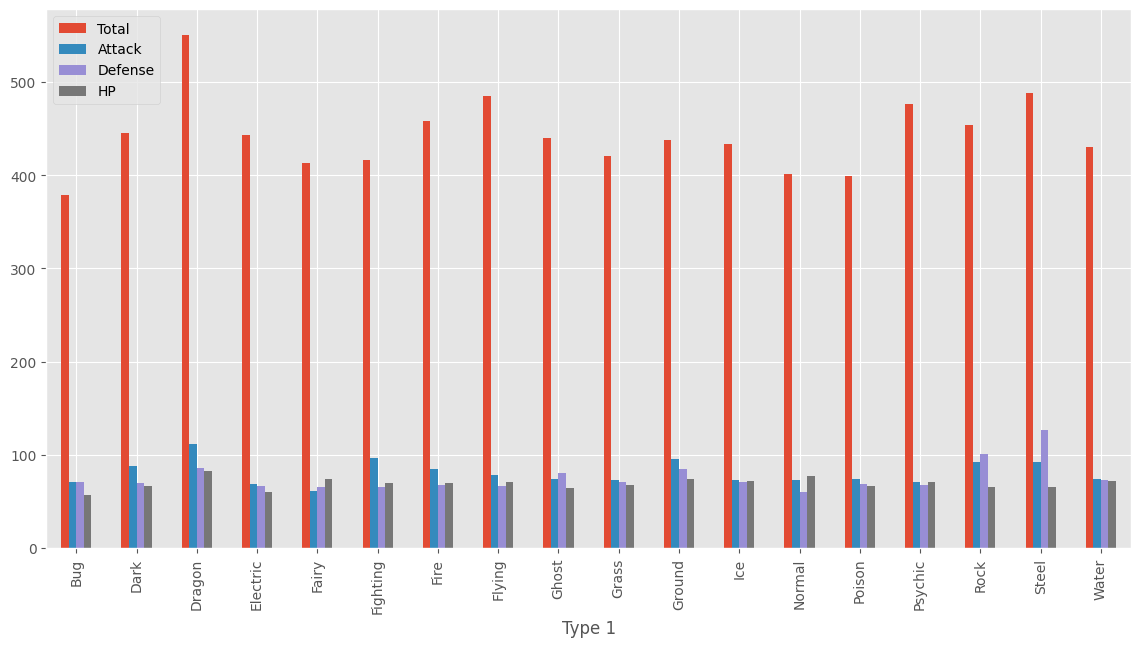

In [ ]:
# assign the throwaway variable _ to suppress Axes output
_ = df[['Type 1','Total', 'Attack', 'Defense', 'HP']].groupby(['Type 1']).mean().plot(figsize=(14,7), kind='bar')

Normalize each stat to a sum of 1, to visualize trends more effectively.

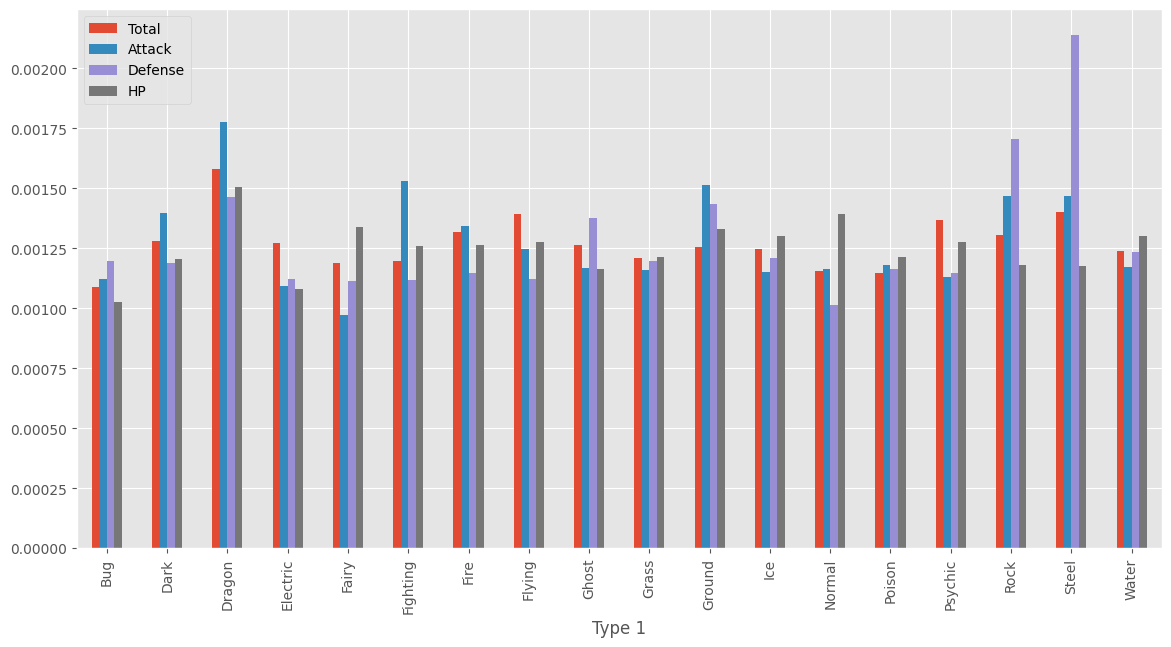

In [ ]:
def normalizedf(df: pd.DataFrame, col: str) -> None:
  """
  inplace normalize a column in a dataframe
  """
  df[col] = df[col].apply(lambda x : x / df[col].sum())
df_norm = df.copy() # copy the df to retain the original
normalizedf(df_norm, "Total")
normalizedf(df_norm, "Attack")
normalizedf(df_norm, "Defense")
normalizedf(df_norm, "HP")
_ = df_norm[['Type 1','Total', 'Attack', 'Defense', 'HP']].groupby(['Type 1']).mean().plot(figsize=(14,7), kind='bar')